# Plot of proportion of land surface exceeding 38.8C UTCI

Uses only HadGEM3 monthly mean data from SSP5-8.5

In [1]:
import iris
from iris.experimental.equalise_cubes import equalise_attributes
from iris.util import unify_time_units
import iris.analysis.cartography
import iris.coord_categorisation
import matplotlib.pyplot as pl
import numpy as np

In [2]:
modelfile = '/gws/pw/j05/cop26_hackathons/bristol/project10/utci_projections_1deg_monthly/HadGEM3-GC31-LL/ssp585/r1i1p1f3/monthly_avg.nc'

In [3]:
cube_model = iris.load_cube(modelfile, 'utci')

/home/users/pmcjs/.conda/envs/heatstress/lib/python3.9/site-packages/iris/fileformats/cf.py:1038: UserWarning: Ignoring variable 'lat_bnds' referenced by variable 'lat': Dimensions ('time', 'lat', 'bnds') do not span ('lat',)
  warnings.warn(msg)
/home/users/pmcjs/.conda/envs/heatstress/lib/python3.9/site-packages/iris/fileformats/cf.py:1038: UserWarning: Ignoring variable 'lon_bnds' referenced by variable 'lon': Dimensions ('time', 'lon', 'bnds') do not span ('lon',)
  warnings.warn(msg)


In [4]:
cube_model.coord('latitude').guess_bounds()
cube_model.coord('longitude').guess_bounds()
grid_areas = iris.analysis.cartography.area_weights(cube_model)

/home/users/pmcjs/.conda/envs/heatstress/lib/python3.9/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


In [5]:
#new_cube = cube_model.collapsed(['longitude', 'latitude'], iris.analysis.MEAN, weights=grid_areas)
new_cube = cube_model.collapsed(['longitude', 'latitude'], iris.analysis.PROPORTION,
                               function=lambda values: values > (273.15+38.8))

In [6]:
new_cube

Utci (1),time
Shape,1033
Dimension coordinates,
time,x
Scalar coordinates,
latitude,"0.0 degrees, bound=(-90.0, 90.0) degrees"
longitude,"0.0 degrees, bound=(-180.0, 180.0) degrees"
Cell methods,
proportion,"longitude, latitude"


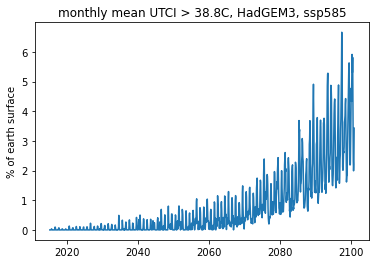

In [7]:
pl.plot(np.arange(2015, 2101.01, 1/12), new_cube.data*100)
pl.ylabel('% of earth surface')
pl.title('monthly mean UTCI > 38.8C, HadGEM3, ssp585')
pl.savefig('/home/users/pmcjs/mm_gt_38p8.png')

In [8]:
data_year = np.zeros(86)
for year in range(86):
    data_year[year] = np.mean(new_cube.data[year*12:year*12+12])

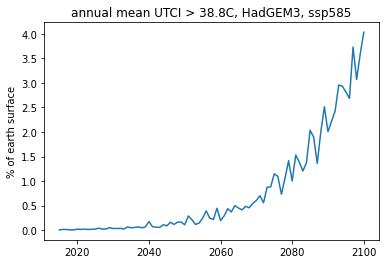

In [9]:
pl.plot(np.arange(2015, 2101), data_year*100)
pl.ylabel('% of earth surface')
pl.title('annual mean UTCI > 38.8C, HadGEM3, ssp585')
pl.savefig('/home/users/pmcjs/am_gt_38p8.png')